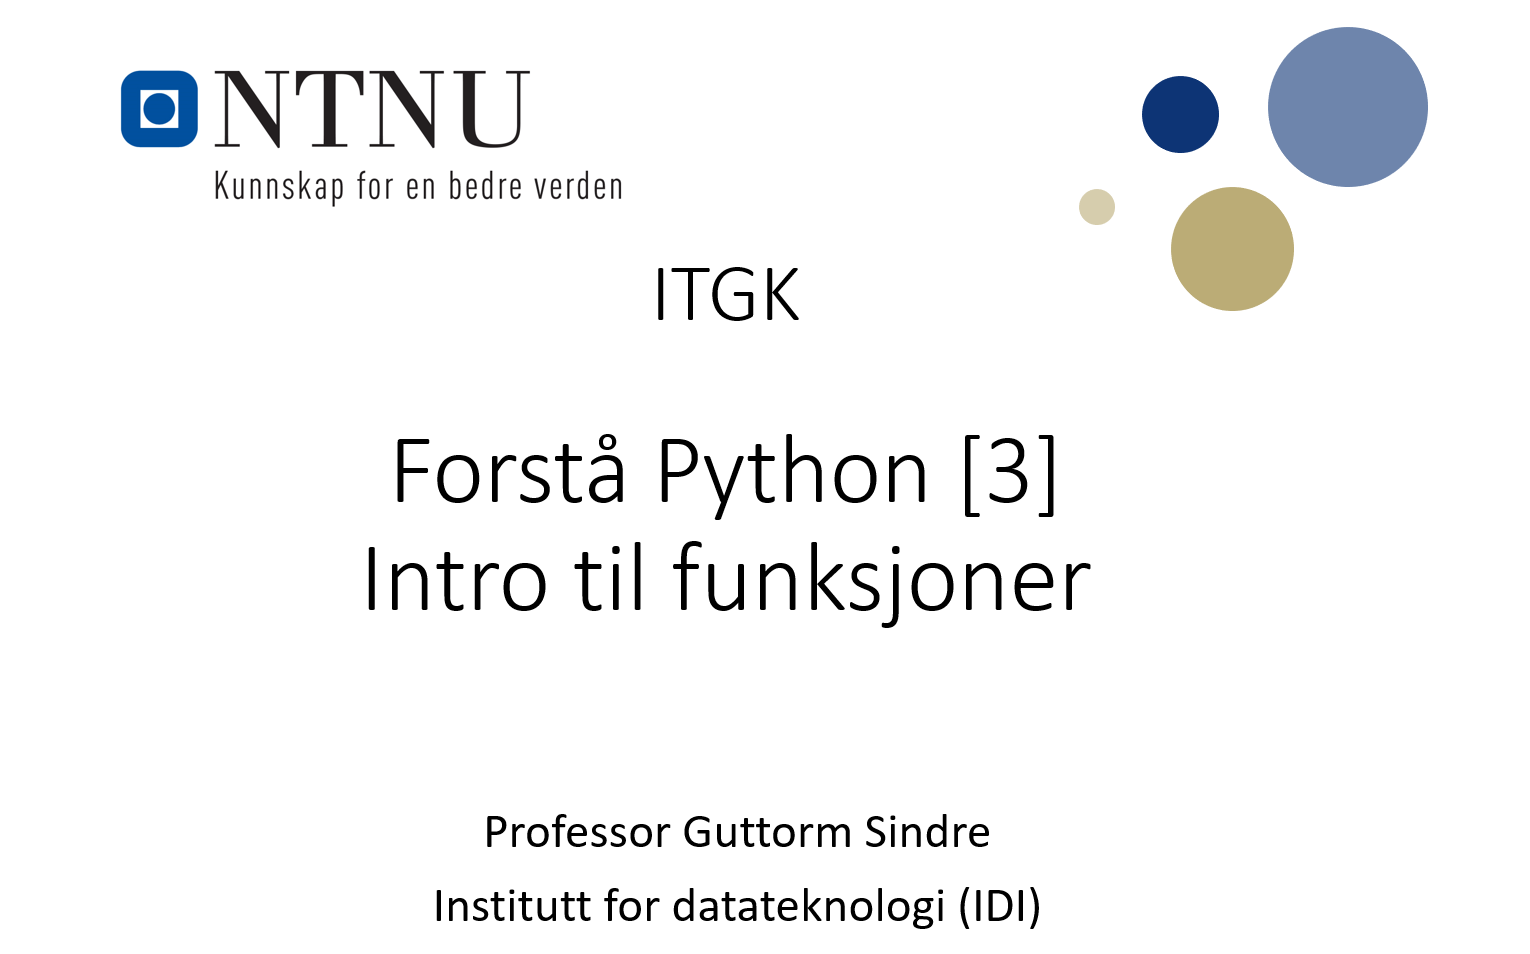

# FORSTÅ Python: Intro til funksjoner

Både i matematiske beregninger og annen slags kode trenger vi ofte funksjoner.

Mange nyttige funksjoner fins allerede innebygget i Python
- i standardbiblioteket: kan _brukes uten videre_.
- i andre bibliotek: må _importere_ biblioteksmodulen

Vi kan også lage våre egne funksjoner
- slike funksjoner må vi _definere_ før vi kan bruke dem

## Funksjoner i standardbiblioteket
Oversikt over funksjoner i Pythons standardbibliotek:
- https://docs.python.org/3/library/functions.html

Her gir vi bare noen eksempler på nyttige funksjoner:

abs() gir absoluttverdien til tall:

In [1]:
abs(-5), abs(3)

(5, 3)

len() gir lengden av tekststrenger eller andre sekvenser:

In [2]:
len("hei")

3

divmod() gir både heltallsdivisjon og modulu av de to tallene som gis inn:

In [3]:
divmod(7, 2)

(3, 1)

dvs., samme tall som vi får ved 

In [4]:
7 // 2, 7 % 2

(3, 1)

## Argument til funksjoner
Verdier som man gir inn i parentesen ved kall av en funksjon kalles "argument".
- kallet __abs(-3)__ - argumentet er heltallet -3
- kallet __len('hei')__ - argumentet er strengen 'hei'
- kallet __divmod(7, 2)__ - denne funksjonen har to argument: 7 og 2

Noen funksjoner kan virke ulikt avhengig av antall argument

Ett eksempel er __round()__ som brukes til avrunding av tall. 

Med bare ett argument (tallet som skal avrundes), blir det avrundet til heltall:

In [5]:
round(212.513)

213

Med to argumenter, gir andre argument antall siffer det skal avrundes til:

In [6]:
round(212.513, 2)

212.51

Dette andre argumentet kan også være negativt, f.eks. -2 for å avrunde til nærmeste hundre:

In [7]:
round(212.513, -2)

200.0

Argumentene inne funksjonsparenteser behøver ikke være verdier direkte
- det kan være større uttrykk, 
- så lenge resultatet blir et gyldig argument til funksjonen

In [8]:
x = 9.3
y = 2.25
a = 2
round(x*y, a) 

20.93

In [9]:
round(x*round(y))

19

# Funksjoner i andre moduler enn standardbiblioteket

For å bruke disse må vi importere funksjonen eller modulen. 

Ett eksempel på en ofte brukt funksjon som ikke fins i standardbiblioteket, er kvadratrot. 

Som vi ser, forsøk på bruk av denne uten import, feiler:

In [10]:
sqrt(2)

NameError: name 'sqrt' is not defined

Det fins flere bibliotek som har kvadratrotfunksjon. F.eks. biblioteket __math__

In [11]:
import math
math.sqrt(2)

1.4142135623730951

Denne kvadratrotfunksjonen virker bare for tall >= 0, med negativt argument feiler den:

In [12]:
math.sqrt(-2)

ValueError: math domain error

Hvis du trenger kvadratrot av negative tall, kan biblioteket __cmath__ brukes:

In [13]:
import cmath
cmath.sqrt(-2)

1.4142135623730951j

I emnet TDT4110 vil vi gjøre mye bruk av biblioteket __numpy__, som også har kvadratrotfunksjon:

In [14]:
import numpy
numpy.sqrt(2)

1.4142135623730951

Denne virker __ikke__ for negative tall:

In [15]:
numpy.sqrt(-2)

/var/folders/dp/ms1zxmgn7c9dm4s2v4zhhl140000gn/T/ipykernel_19240/4206635015.py:1: RuntimeWarning: invalid value encountered in sqrt
  numpy.sqrt(-2)


nan

__Men__ den har en annen fordel, 
- kan ta kvadratrot av en sekvens av tall i ett jafs
- hvis et numpy array gis inn som argument

In [16]:
import numpy
x_values = numpy.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
numpy.sqrt(x_values)

array([1.        , 1.41421356, 1.73205081, 2.        , 2.23606798,
       2.44948974, 2.64575131, 2.82842712, 3.        ])

Dette går ikke med de andre kvadratrotfunksjonene:

In [17]:
math.sqrt(x_values)

TypeError: only size-1 arrays can be converted to Python scalars

## Egendefinerte funksjoner

La oss si at vi trenger å se på en funksjon som 
$$f(x) = x^2 - 3x - 1$$

Ikke innebygget i math eller numpy, men vi kan lage den selv. 

Straks den er definert, kan den brukes:

In [18]:
def f(x):
    return x**2 - 3*x - 1

f(0), f(4)

(-1, 3)

Syntaks for funksjonsdefinisjoner:
- starter med __def__, fulgt av funksjonsnavn og antall parametre (her kun én, x)
- første linje, funksjonshodet, avsluttes med kolon __:__
- kodelinjene som skal utføres i funksjonen er rykket inn
- her kun ei linje, regner ut svarverdien
- __return__ skrives fremst i kodelinja som gir funksjonens resultat

In [ ]:
def f(x):
    return x**2 - 3*x - 1

def-setninga gjør __ikke__ at funksjonen blir utført, bare at den blir __definert__, dvs.
- navnet __f__ huskes i programmets navnerom som navn på en funksjon
- og viser til koden som funksjonen skal utføre

Funksjonen blir utført når den senere blir kallet fra andre deler av programmet:

In [19]:
a = 2.3
b = 3.8
print(f(2*a - b))
print(f(a - b))

-2.76
5.75


Vi kan bruke innebygde funksjoner i egendefinerte funksjoner

Under lager vi en egendefinert funksjon for $$h(x) = 0.5(\sin{\sqrt{x}})$$ som bruker sinus og kvadratrot fra numpy:

In [20]:
import numpy
def h(x):
    return 0.5 * numpy.sin(numpy.sqrt(x))

h(5), h(7)

(0.393374565773607, 0.23788591907637566)

Ved import av numpy er det vanlig å innføre det kortere aliaset __np__
- da nok å skrive np.sin og np.sqrt
- heller enn numpy.sin og numpy.sqrt

(Sparer ingen tastetrykk totalt sett i dette lille eksemplet, men i et større program hvor vi skal gjøre mye bruk av numpy, vil dette være klart fordelaktig)

In [21]:
import numpy as np
def h(x):
    return 0.5 * np.sin(np.sqrt(x))

h(5), h(7) 

(0.393374565773607, 0.23788591907637566)

## Oppsummering
Forhåndsdefinerte funksjoner i Python kan
- brukes direkte hvis de fins i standardbiblioteket
    - f.eks. abs(), len(), round()
- brukes etter import hvis i andre biblioteker
    - f.eks. math.sqrt(), math.sin(), numpy.sqrt(), numpy.sin()

Egendefinerte funksjoner lager vi selv med 

__def funksjonsnavn(argument): ...__
- innrykk for kodelinje(r) inni funksjonen


__Poeng med variable__: Huske utregnede verdier
- slipper å regne ut på nytt

__Poeng med funksjoner__: Huske kodelinje(r) som inngår i en beregning
- slipper å gjenta samme kode flere steder
- i stedet bare kalle funksjonen hver gang den trengs